In [2]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import lsst.daf.butler as dafButler

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

afwDisplay.setDefaultBackend("matplotlib")

In [3]:
# NTS
#dataPath = "/repo/LSSTComCam"
# RSP
dataPath = "/repo/main"
instrument = "LSSTComCam"
butler = dafButler.Butler(dataPath, collections=["LSSTComCam/raw/all", "LSSTComCam/calib/unbounded"],
                          instrument=instrument)

In [4]:
#camera = butler.get("camera", instrument=instrument)

In [11]:
day_obs = 20210401
seq_num = 25
raftName = "R22"
detector = 0
dataId = {"instrument": "LSSTComCam", "detector.raft": raftName, "detector.id": detector,
          "exposure.day_obs": day_obs, "exposure.seq_num": seq_num}

In [12]:
raw = butler.get('raw', dataId)

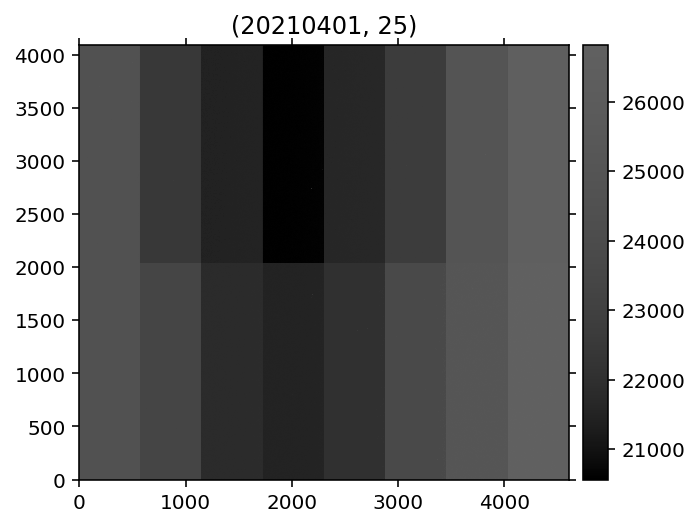

In [13]:
# you only need this in every cell because I'm using %matplotlib notebook. DM Bug??
disp = afwDisplay.Display(1)    
disp.scale('asinh', 'zscale')
disp.mtv(raw, title=(dataId["exposure.day_obs"], dataId["exposure.seq_num"]))
#cameraGeomUtils.overlayCcdBoxes(raw.getDetector(), display=disp)

In [14]:
amps = raw.getDetector()
amp_data = [raw[amps[i].getRawDataBBox()].image.array for i in range(len(amps))]

In [15]:
per_col_median = [np.median(amp_data[i], axis=0) for i in range(len(amps))]

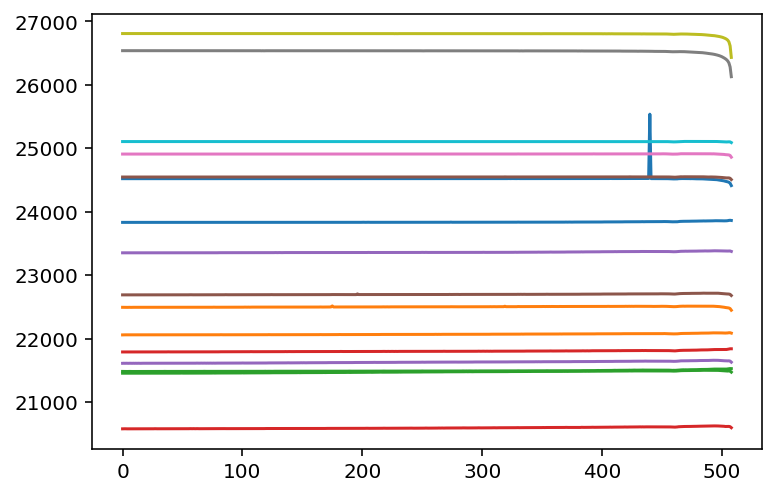

In [16]:
for i in range(len(amps)):
    plt.plot(np.arange(per_col_median[i].shape[0]), per_col_median[i])

In [17]:
raw.getInfo().getMetadata().toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Header information ----',
  '---- Information from Camera per sensor ----',
  "= '        '",
  '---- Geometry from Camera ----',
  "= '        '",
  '---- Checksums ----'],
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2021-04-01T23:37:1

In [ ]:
#raw.getInfo().getVisitInfo().getExposureTime()

In [ ]:
#bias = butler.queryMetadata('raw', ['dayObs', 'visit', 'seqnum'], imageType='BIAS')[-2]
#print(bias)
#biasId = dict(visit=bias[1], seqnum=bias[2], dayObs=bias[0])
#biasData = butler.get('raw', biasId, imageType='BIAS')

In [ ]:
#disp = afwDisplay.Display(1)    # you only need this in every cell because I'm using %matplotlib notebook. DM Bug??
#disp.scale('asinh', 'zscale')
#disp.mtv(biasData, title=biasId.items())